**Downlaod YOLOv10 repository and setup the environment**

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 65.6 MB/s eta 0:00:00


In [3]:
!pip install -q supervision roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.8 MB/s eta 0:00:00


In [ ]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt
!ls -lh {HOME}/weights

total 408M
-rw-r--r-- 1 root root  80M May 26 15:53 yolov10b.pt
-rw-r--r-- 1 root root 100M May 26 15:53 yolov10l.pt
-rw-r--r-- 1 root root  64M May 26 15:54 yolov10m.pt
-rw-r--r-- 1 root root  11M May 26 15:54 yolov10n.pt
-rw-r--r-- 1 root root  32M May 26 15:54 yolov10s.pt
-rw-r--r-- 1 root root 123M May 26 15:54 yolov10x.pt


**Download Traffice Detection Dataset from Kaggle**

In [4]:
!pip install kaggle

In [5]:
! mkdir kaggle

In [6]:
%cd kaggle

/content/kaggle


In [7]:
# Upload kaggle.json file

from google.colab import files
print('Upload kaggle.json \n')
uploaded = files.upload()


Upload kaggle.json 



Saving kaggle.json to kaggle.json


In [8]:
! chmod 600 /content/kaggle/kaggle.json

In [9]:
! kaggle datasets download yusufberksardoan/traffic-detection-project

Dataset URL: https://www.kaggle.com/datasets/yusufberksardoan/traffic-detection-project
License(s): CC-BY-NC-SA-4.0
 99% 580M/583M [00:21<00:00, 27.2MB/s]
100% 583M/583M [00:21<00:00, 28.9MB/s]


In [10]:
%pwd

'/content/kaggle'

In [11]:
! unzip traffic-detection-project.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/labels/ant_sales-12020_png_jpg.rf.116c568e2fa6537db6abb213ea9bd88c.txt  
  inflating: train/labels/ant_sales-12020_png_jpg.rf.59c39ca227b58e13c54959a8edef0001.txt  
  inflating: train/labels/ant_sales-12020_png_jpg.rf.9c4cf0ef1bcc1e09a508ff3bc020c503.txt  
  inflating: train/labels/ant_sales-12020_png_jpg.rf.a40f6b1a5ae047f13a5576acde754ae4.txt  
  inflating: train/labels/ant_sales-12020_png_jpg.rf.f4b4f0a44f4210cebb9cb9ab3bedce23.txt  
  inflating: train/labels/ant_sales-12025_png_jpg.rf.81d9ef94ea17cbba2690830f87e64d7b.txt  
  inflating: train/labels/ant_sales-12025_png_jpg.rf.a4f8564b6e4976796e3793ba5192a388.txt  
  inflating: train/labels/ant_sales-12025_png_jpg.rf.c92e5162026aa26821964cf7d3a5ad17.txt  
  inflating: train/labels/ant_sales-12030_png_jpg.rf.081cb89981eb32d3875f22a3f20c7da6.txt  
  inflating: train/labels/ant_sales-12030_png_jpg.rf.33034b367dd9509b2ba7f594d9093018.txt  
  inflating: train/labels/ant

**Train the yolov10 Model**

In [ ]:
# %cd {HOME}

# !yolo task=detect mode=train epochs=10 batch=32 plots=True \
# model={HOME}/weights/yolov10n.pt \
# data={dataset.location}/data.yaml

In [ ]:
# %cd {HOME}

!yolo task=detect mode=train epochs=60 batch=32 plots=True \
model=/content/weights/yolov10s.pt \
data=/content/kaggle/data.yaml

New https://pypi.org/project/ultralytics/8.2.49 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/weights/yolov10s.pt, data=/content/kaggle/data.yaml, epochs=60, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, 

/content


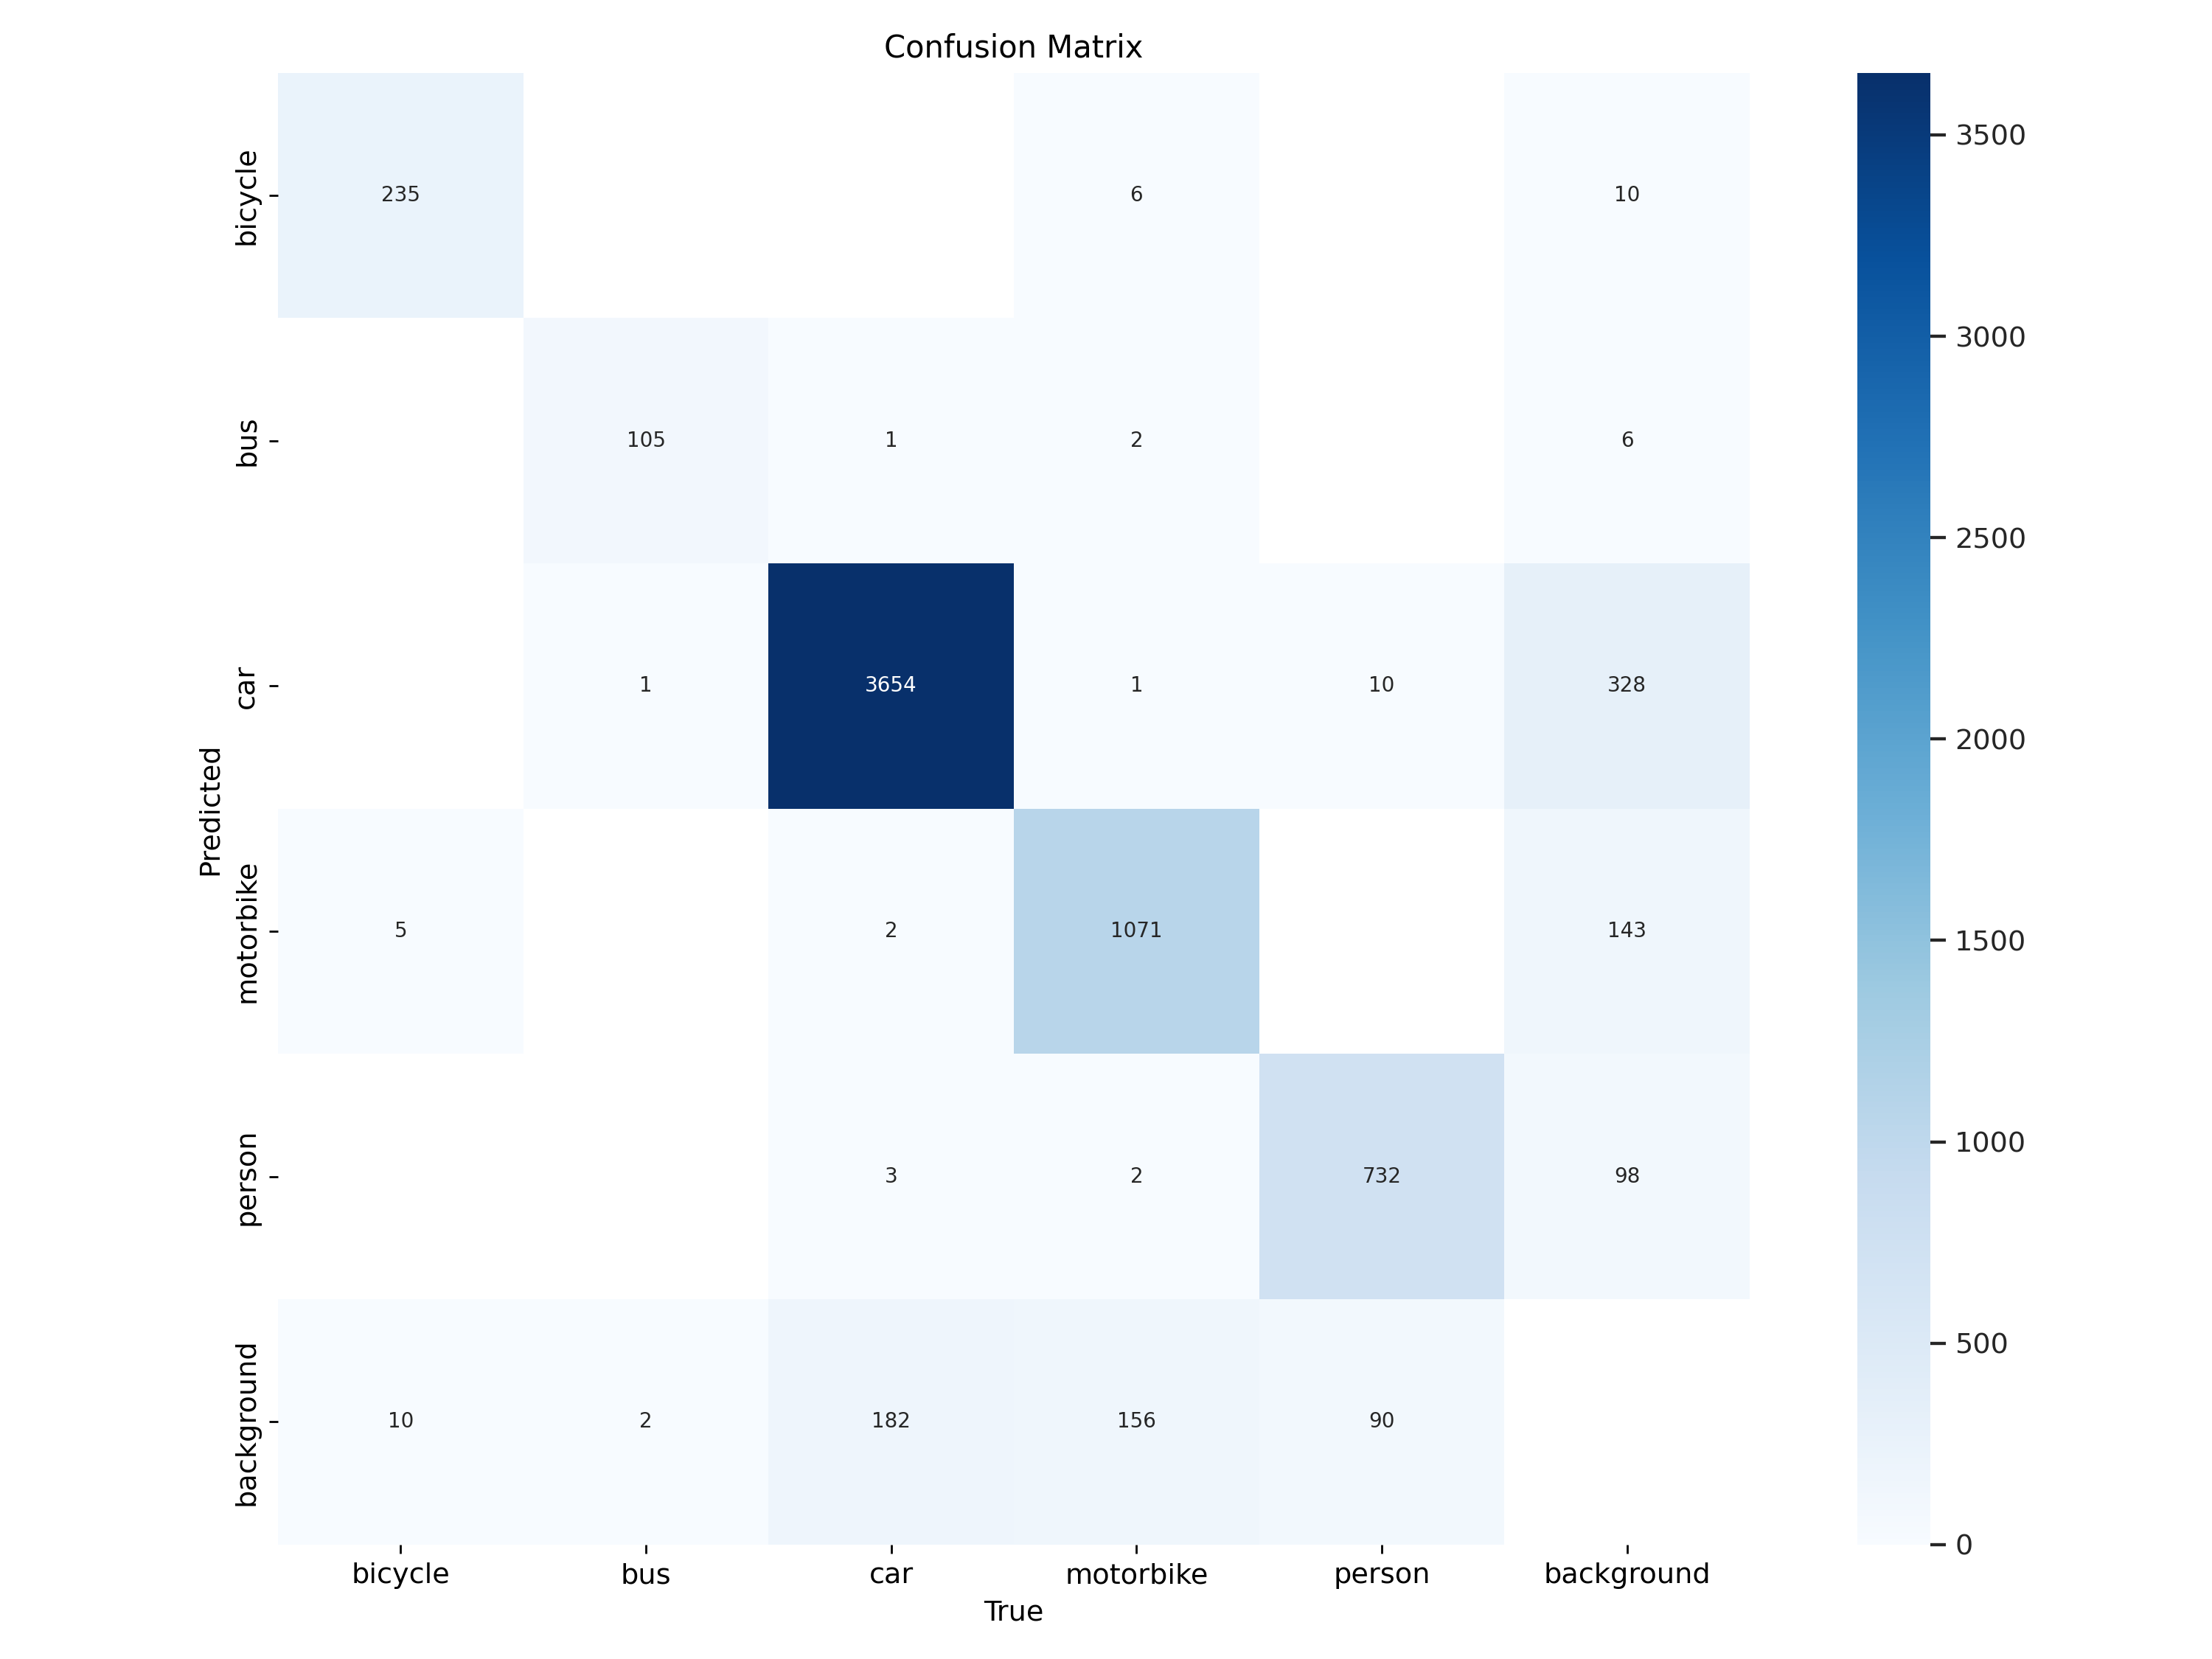

In [ ]:
# Visualize confusion matrix

from IPython.display import Image
%cd /content
Image(filename=f'/content/kaggle/runs/detect/train/confusion_matrix.png', width=600)

/content


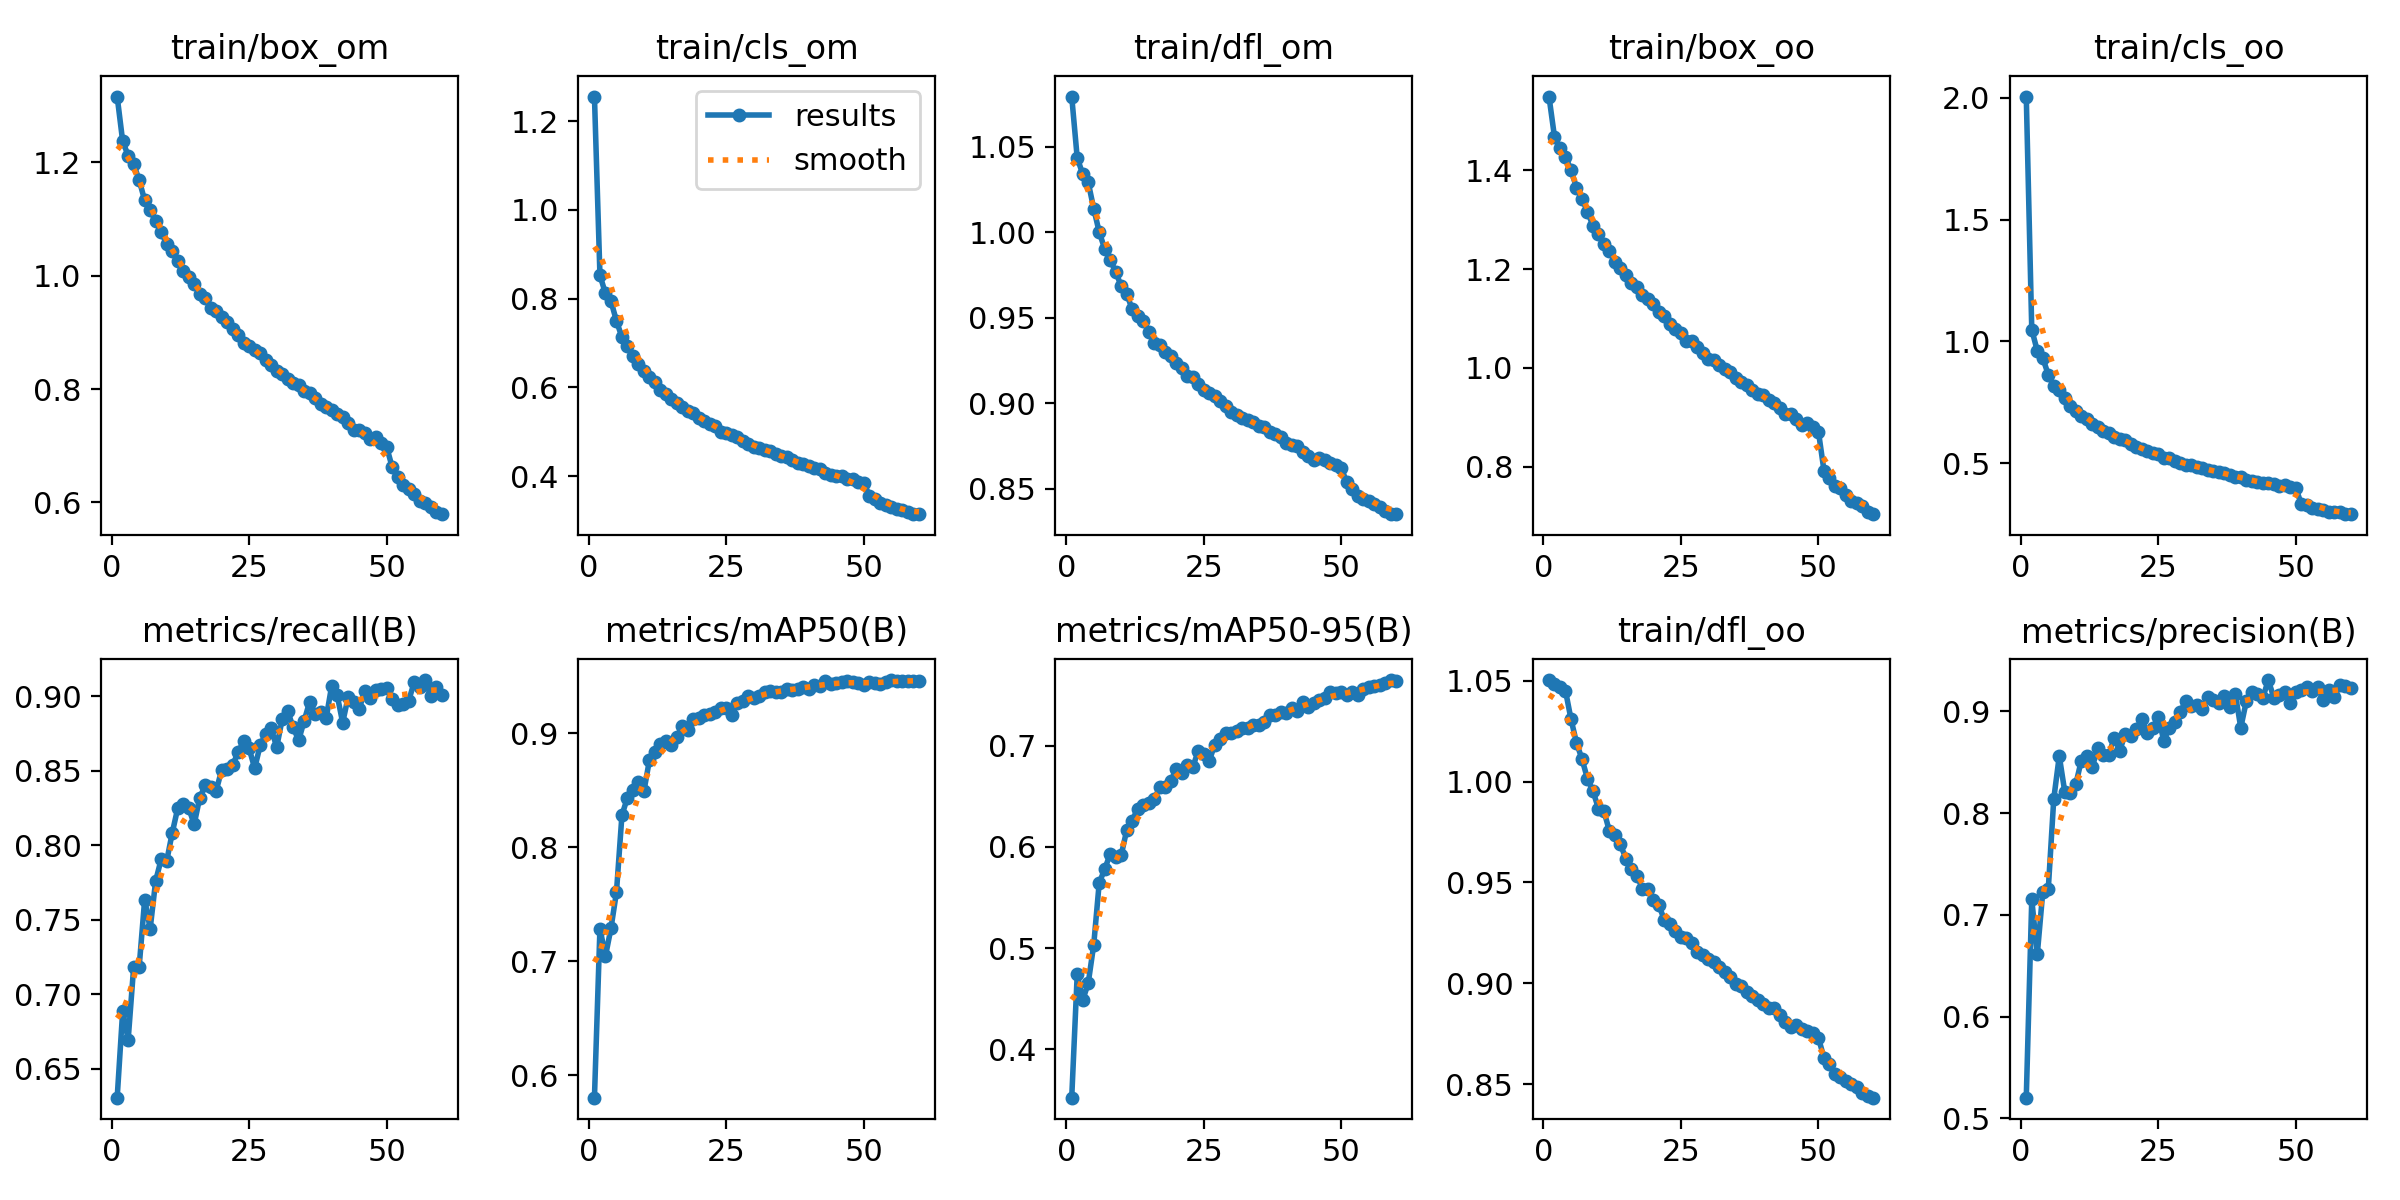

In [ ]:
# Visualize training graphs

%cd /content
Image(filename=f'/content/kaggle/runs/detect/train/results.png', width=600)

**Run Inference**

**Run Inference on yolo10s model and get inference time on GPU as well as CPU**

In [24]:
import cv2
import supervision as sv
from ultralytics import YOLOv10

model = YOLOv10(f'/content/best_10n.pt')

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=f"/content/kaggle/valid/images",
    annotations_directory_path=f"/content/kaggle/valid/labels",
    data_yaml_path=f"/content/kaggle/data.yaml"
)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()


0: 640x640 2 bicycles, 2 cars, 2 motorbikes, 15.8ms
Speed: 2.0ms preprocess, 15.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


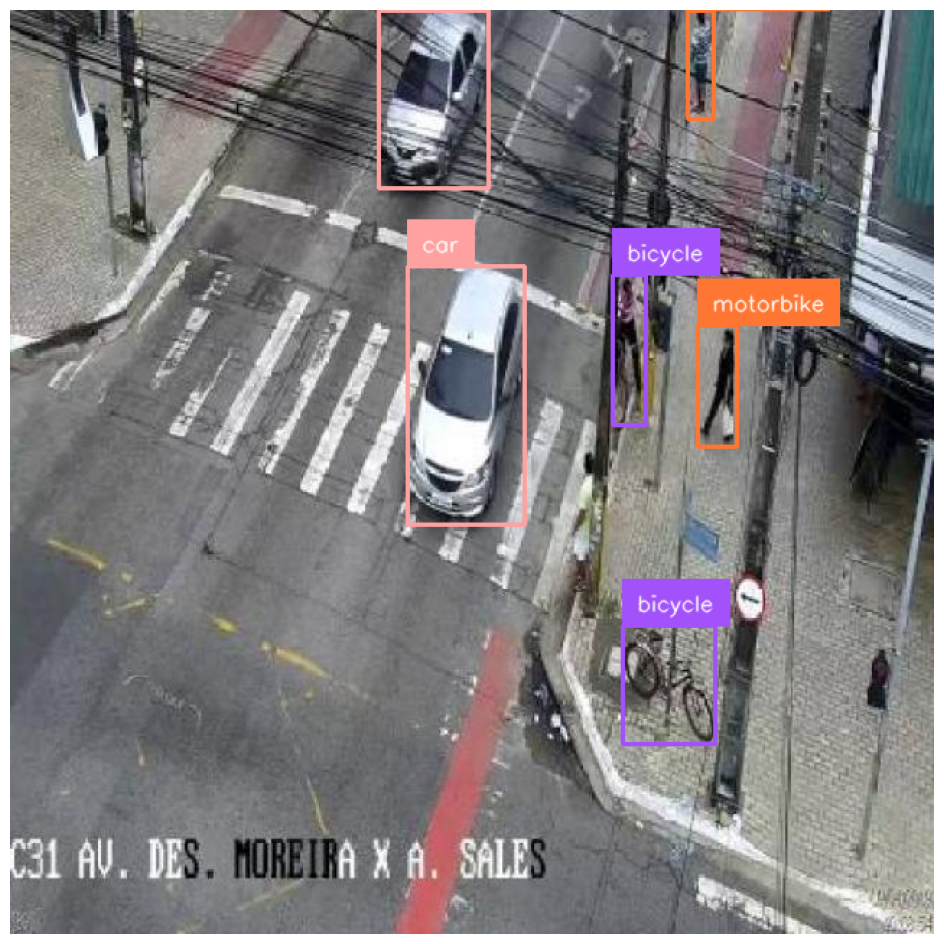

In [25]:
import random

random_image = random.choice(list(dataset.images.keys()))
random_image = dataset.images[random_image]

results = model(source=random_image, conf=0.25)[0]
detections = sv.Detections.from_ultralytics(results)

annotated_image = bounding_box_annotator.annotate(
    scene=random_image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [26]:
from ultralytics import YOLOv10

results = model.predict(source="/content/kaggle/test/images")


image 1/279 /content/kaggle/test/images/aguanambi-1000_png_jpg.rf.7179a0df58ad6448028bc5bc21dca41e.jpg: 640x640 2 bicycles, 16 cars, 2 motorbikes, 1 person, 10.0ms
image 2/279 /content/kaggle/test/images/aguanambi-1095_png_jpg.rf.4d9f0370f1c09fb2a1d1666b155911e3.jpg: 640x640 1 bicycle, 15 cars, 4 motorbikes, 10.0ms
image 3/279 /content/kaggle/test/images/aguanambi-1100_png_jpg.rf.8b7574e1c4f3fd7b654c2a693404fd2d.jpg: 640x640 1 bicycle, 14 cars, 4 motorbikes, 9.0ms
image 4/279 /content/kaggle/test/images/aguanambi-1240_png_jpg.rf.7e110b54d205ef0537ddc5dec81a79c2.jpg: 640x640 12 cars, 5 motorbikes, 8.9ms
image 5/279 /content/kaggle/test/images/aguanambi-1540_png_jpg.rf.b8ea6dd9130d82a3b6163bc3aaa823d3.jpg: 640x640 12 cars, 1 motorbike, 1 person, 10.6ms
image 6/279 /content/kaggle/test/images/aguanambi-1680_png_jpg.rf.fede1a51e422cc8fd628a4846615f65f.jpg: 640x640 16 cars, 3 motorbikes, 9.6ms
image 7/279 /content/kaggle/test/images/aguanambi-2105_png_jpg.rf.913b43f78d50d1ac51dcf3e43cc7da2

In [27]:
inference_time_ms = 1.6 + 12.1 + 1.1
inference_time =  inference_time_ms * 0.001
FPS = 1/inference_time
print(f"Total Interfence time = {inference_time_ms}ms")
print(f"FPS = {FPS}")

Total Interfence time = 14.799999999999999ms
FPS = 67.56756756756758


**Inference on CPU**

In [32]:
from ultralytics import YOLOv10

results = model.predict(source="/content/kaggle/test/images",
              device='cpu')


image 1/279 /content/kaggle/test/images/aguanambi-1000_png_jpg.rf.7179a0df58ad6448028bc5bc21dca41e.jpg: 640x640 2 bicycles, 16 cars, 2 motorbikes, 1 person, 17.5ms
image 2/279 /content/kaggle/test/images/aguanambi-1095_png_jpg.rf.4d9f0370f1c09fb2a1d1666b155911e3.jpg: 640x640 1 bicycle, 15 cars, 4 motorbikes, 15.3ms
image 3/279 /content/kaggle/test/images/aguanambi-1100_png_jpg.rf.8b7574e1c4f3fd7b654c2a693404fd2d.jpg: 640x640 1 bicycle, 14 cars, 4 motorbikes, 15.6ms
image 4/279 /content/kaggle/test/images/aguanambi-1240_png_jpg.rf.7e110b54d205ef0537ddc5dec81a79c2.jpg: 640x640 12 cars, 5 motorbikes, 16.0ms
image 5/279 /content/kaggle/test/images/aguanambi-1540_png_jpg.rf.b8ea6dd9130d82a3b6163bc3aaa823d3.jpg: 640x640 12 cars, 1 motorbike, 1 person, 9.5ms
image 6/279 /content/kaggle/test/images/aguanambi-1680_png_jpg.rf.fede1a51e422cc8fd628a4846615f65f.jpg: 640x640 16 cars, 3 motorbikes, 9.9ms
image 7/279 /content/kaggle/test/images/aguanambi-2105_png_jpg.rf.913b43f78d50d1ac51dcf3e43cc7da

In [33]:
inference_time_ms = 1.5 + 10.6 + 1.0
inference_time =  inference_time_ms * 0.001
FPS = 1/inference_time
print(f"Total Interfence time = {inference_time_ms}ms")
print(f"FPS = {FPS}")

Total Interfence time = 13.1ms
FPS = 76.33587786259541


In [ ]:
!zip -r /content/kaggle/runs/detect/train.zip /content/kaggle/runs/detect/train

  adding: content/kaggle/runs/detect/train/ (stored 0%)
  adding: content/kaggle/runs/detect/train/labels_correlogram.jpg (deflated 31%)
  adding: content/kaggle/runs/detect/train/train_batch1.jpg (deflated 1%)
  adding: content/kaggle/runs/detect/train/val_batch1_labels.jpg (deflated 4%)
  adding: content/kaggle/runs/detect/train/results.png (deflated 9%)
  adding: content/kaggle/runs/detect/train/val_batch1_pred.jpg (deflated 4%)
  adding: content/kaggle/runs/detect/train/train_batch2.jpg (deflated 1%)
  adding: content/kaggle/runs/detect/train/F1_curve.png (deflated 9%)
  adding: content/kaggle/runs/detect/train/val_batch0_labels.jpg (deflated 5%)
  adding: content/kaggle/runs/detect/train/P_curve.png (deflated 13%)
  adding: content/kaggle/runs/detect/train/events.out.tfevents.1720173237.58b3fe02a009.4311.0 (deflated 90%)
  adding: content/kaggle/runs/detect/train/train_batch9102.jpg (deflated 4%)
  adding: content/kaggle/runs/detect/train/val_batch0_pred.jpg (deflated 5%)
  adding

In [ ]:
from google.colab import files
files.download("/content/kaggle/runs/detect/train.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>